## Introduction

In this exercise, we will motivate the least-squares problem for linear regression.  The point of this exercise is to recall some relevant ideas/notation from calculus and linear algebra and to practice some basic calculations that are common in the optimization world.

We provide problems <i>and</i> their solutions, so that this document is suitable for self study.  But, we encourage readers to try the exercises before looking at the answers.  Feel free to do the math exercises on scrap paper---no need to learn how to type up equations!

## Problem setup

Suppose we wish to predict the height of a plant grown for a month as a function of several factors:
<ul>
    <li> The amount of water we give the plant per week, in liters ($x_1$)</li>
    <li> The amount of fertilizer we mix with the soil, in cubic inches ($x_2$)</li>
    <li> The distance of the plant to the window, in feet ($x_3$)</li>
    <li> The height of the plant at the beginning of the month, in inches ($x_4$)</li>
</ul>
We can use a <i>vector</i> $x\in\mathbb R^4$ to represent a given plant.  Here, $\mathbb R^4$ denotes the set of 4-dimensional vectors:  $x=(x_1,x_2,x_3,x_4).$

We will assume in our course that vectors are <i>column vectors</i>, meaning that points in $\mathbb R^k$ can be written as $k\times 1$ matrices:
$$x=\begin{pmatrix} x_1\\x_2\\x_3\\x_4 \end{pmatrix} = \begin{pmatrix} \textrm{water} \\ \textrm{fertilizer} \\ \textrm{window distance} \\ \textrm{initial height}\end{pmatrix}.$$

## Linear regression

Let's say we have a collection of $n$ plants.  Each plant $p$, where $p\in\{1,\ldots,n\}$, experiences its own factors described in the previous section, which we can store in a vector $x^{(p)}\in\mathbb R^4$.  We grow each plant for a month and measure its height $h^{(p)}\in \mathbb R$.  Our goal is to develop a <i>model</i> for predicting $h$ from $x$, that is, for predicting the height of the plant after a month of growth from the factors we identified above.

In <i>linear regression</i>, we assume that $h$ is well-approximated by a weighted average of the elements of $x$.  That is, we think there is an unknown <i>weight vector</i> $w\in\mathbb R^4$ such that $$h\approx w_1x_1+w_2x_2+w_3x_3+w_4 x_4 = \sum_{k=1}^4 w_k x_k= w\cdot x.$$ Make sure you understand the three equivalent ways to denote the sum on the right of the $\approx$; the fourth is a <i>dot product</i> between vectors $x,w\in\mathbb R^4$.

Here's a fourth way to compute the same value, using a matrix transpose:
$$w\cdot x=w^\top x = \begin{pmatrix} w_1 \\ w_2 \\ w_3 \\ w_4 \end{pmatrix}^\top \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} =\begin{pmatrix} w_1 & w_2 & w_3 & w_4 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix}.$$

## Least-squares

To predict the heights of plants in the future, we would like to estimate $w$ given our data $\{(x^{(1)},h^{(1)}),\ldots,(x^{(n)},h^{(n)})\}.$  A good choice of $w$ will have the property that $(w\cdot x^{(p)}-h^{(p)})^2$ is close to zero for all $p\in\{1,\ldots,n\}$.  Summing over our data points, a reasonable <i>objective function</i> measuring the quality of a potential choice of $w\in\mathbb R^4$ is the following:
$$f(w):=\frac{1}{2}\sum_{p=1}^n (w\cdot x^{(p)}-h^{(p)})^2$$

<b>Exercise 1:</b>  Write an expression for the partial derivative $\frac{\partial f}{\partial w_i}.$

<b>Solution 1:</b>  $$\frac{\partial f}{\partial w_i} = \sum_{p=1}^n (w\cdot x^{(p)}-h^{(p)})x^{(p)}_i.$$

<b>Exercise 2:</b>  Write an expression for the gradient $\nabla_w f(w)$, that is, the gradient of the function $f$ with respect to the variable $w$.

<b>Solution 2:</b>  $$\nabla_w f = \sum_{p=1}^n (w\cdot x^{(p)}-h^{(p)})x^{(p)}$$

## Matrix notation

We can construct a matrix $X\in\mathbb R^{n\times 4}$ containing all of our data points in its rows:
    $$X:=\begin{pmatrix}  x^{(1)}_1 & x^{(1)}_2 & x^{(1)}_3 & x^{(1)}_4\\ 
    x^{(2)}_1 & x^{(2)}_2 & x^{(2)}_3 & x^{(2)}_4 \\ \vdots & \vdots & \vdots & \vdots\\ x^{(n)}_1 & x^{(n)}_2 & x^{(n)}_3 & x^{(n)}_4 \end{pmatrix}.$$

Recall the vector norm: $$\|v\|_2:=\sqrt{v_1^2+v_2^2+\cdots+v_n^2}.$$

The following exercise is intended to help you remember linear algebra, including matrix-vector products, transposes, and vector norms.  It may help to do some examples on paper.

<b>Exercise 3:</b>  Justify the expression $f(w)=\frac{1}{2} \|Xw - h\|_2^2$.  Here, $h\in\mathbb R^n$ is the vector of $h$ values for all the plants.

<b>Exercise 4:</b> Justify the expression $\nabla_w f(w) = X^\top(Xw - h).$

## Coding

Now, let's code this up.  Run the following segment of code to load the appropriate Python libraries:

In [8]:
import numpy as np
from numpy.linalg import norm
from numpy.random import rand
from matplotlib import pyplot as plt

<b>Exercise 5:</b> Implement $f(w)$ as a Python function; we will use NumPy to store matrices and vectors.

In [11]:
def f(w,X,h):
    return 0.5*norm(X.dot(w)-h)**2

<b>Exercise 6:</b> Implement the gradient $\nabla_w f$ as a Python function.

In [10]:
def gradf(w,X,h):
    return X.transpose().dot(X.dot(w) - h)

We'll implement the most popular optimization algorithm to find a $w$ that minimizes $f(w)$, known as <i>gradient descent</i>.  First, do some reading online about this technique; there are <i>many</i> great writeups of gradient descent, such as this one:  https://towardsdatascience.com/machine-learning-101-an-intuitive-introduction-to-gradient-descent-366b77b52645

In the end, gradient descent updates an estimate of the best $w$ using the following formula:  $$w\gets w - \eta \nabla_w f(w),$$ where $\eta>0$ is the <i>learning rate.</i>  

<b>Exercise 7:</b> Implement the gradient descent step in the code below.  If it's implemented correctly, the objective value should go to near 0 in the plot.

[[1.003533  ]
 [2.00151484]
 [3.0010978 ]
 [4.00268399]]


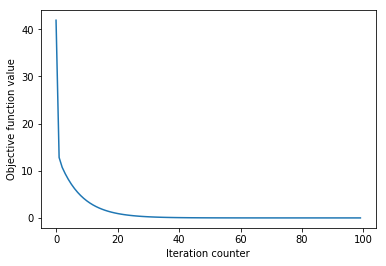

In [12]:
# Synthesize a dataset of size 100
X = rand(100,4)
w_groundtruth = np.array([[1],[2],[3],[4]])
y = X.dot(w_groundtruth) + 0.01*rand(100,1)

# Parameters of gradient descent:  Feel free to play with these!
eta = 0.01
n_steps = 100

# Initialize a guess for the solution "w"
w = np.zeros((4,1))

# We will use the following vector to keep track of objective values
objective_values = np.zeros((n_steps,1))

for i in range(n_steps):
    w -= eta*gradf(w,X,y) # gradient descent step
    objective_values[i] = f(w,X,y) # store objective value


# Plot the objective as a function of the iteration
plt.plot(objective_values)
plt.xlabel('Iteration counter')
plt.ylabel('Objective function value')

print(w)

Congratulations!  You have implemented your first optimization problem and solver.  Notice that the code also prints out the estimate you get from gradient descent of the unknown variable $w$, which should satisfy $w\approx(1,2,3,4).$

<b>Exercise 8:</b>  You have implemented the basics of linear regression using least-squares, including a simple optimization algorithm.  Discuss advantages and disadvantages of this technique for regression.

<b>Solution 8:</b>  Linear regression is an extremely simplistic model.  It is relatively straightforward to optimize for $c$, using the technique above, direct linear system solvers, or other techniques (stochastic gradient descent, conjugate gradients, QR factorization, ...).  On the other hand, many relationships are <i>nonlinear</i>.  As a simple example, this model can predict negative numbers, which doesn't make sense!

# SGD

In [1]:
def stochGradf(w,X,h):
    # pick a random training data point
    (n,d)=X.shape
    idx = np.random.randint(n)
    x = X[idx,:].reshape(1,d)  # to make it into a proper row vector
    y = x*(x.dot(w)-h[idx])    # the actual stochastic gradient
    return y.T                 # annoying Python transpose junk needed!

[[0.09232165]
 [1.00893091]
 [1.99785171]
 [2.91056519]]


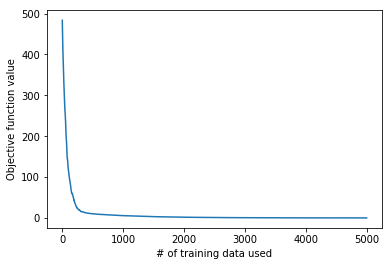

In [20]:
# Synthesize a dataset of size n x d
n = 100
d = 4

X = rand(n,d)
w_groundtruth = np.arange(d).reshape(d,1)
y = X.dot(w_groundtruth) + 0.01*rand(n,1)


# Parameters of gradient descent:  Feel free to play with these!
eta    = 0.007
maxiter = 5000

# Initialize a guess for the solution "w"
w = np.zeros((d,1))

# We will use the following vector to keep track of objective values
objective_values = np.zeros((maxiter,1))

for i in range(maxiter):
    w -= eta*stochGradf(w,X,y)     # gradient descent step
    objective_values[i] = f(w,X,y) # store objective value

# Plot the objective as a function of the iteration
plt.plot(objective_values)
plt.xlabel('# of training data used')
plt.ylabel('Objective function value')

print(w)

In [19]:
print(w_groundtruth)

[[0]
 [1]
 [2]
 [3]]
